In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = '../output/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

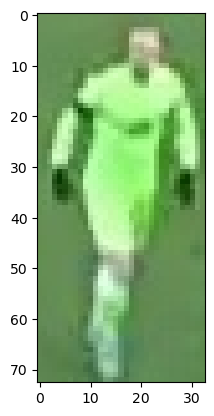

In [4]:
plt.imshow(image)

### Take the top half of the imaeg to get T-shirt color

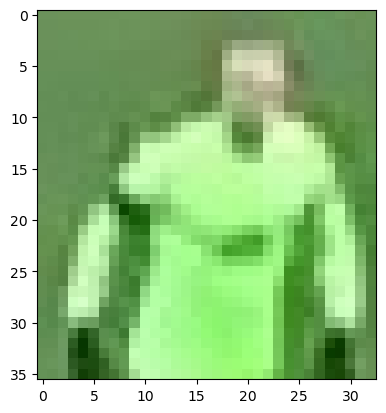

In [5]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

### Cluster the image into two clusters (player and background)

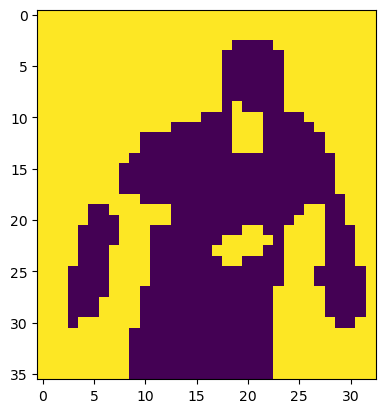

In [11]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
# To get background color class we can get color of the border which has background color
corner_clusters = [clustered_image[0,0], clustered_image[0,-1],clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [ ]:
# Color of the player's T-shirt (approximately)
kmeans.cluster_centers_[player_cluster]

array([173.16283925, 237.95615866, 148.20876827])